|   |Positive (predicted) | Negative (predicted) |   
|---|---|---|
|   |   |   |   
|Positive (actual) | Correct!  |  **Type 2 Error**  |  
|Negative (actual)  | **Type 1 Error** | Correct!  | 

- **True Positives**: A positive class observation (1) is correctly classified as positive by the model.
- **False Positive**: A negative class observation (0) is incorrectly classified as positive.
- **True Negative**: A negative class observation is correctly classified as negative.
- **False Negative**: A positive class observation is incorrectly classified as negative.

Load logistic regression, numpy, and cross validation train/test split functions.

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import numpy as np
import pandas as pd

Load a dataset of breast cancer biopsy diagnostics from the University of Wisconsin breast cancer data. Do some light cleaning.

In [5]:
column_names = ['id',
                'clump_thickness',
                'cell_size_uniformity',
                'cell_shape_uniformity',
                'marginal_adhesion',
                'single_epithelial_size',
                'bare_nuclei',
                'bland_chromatin',
                'normal_nucleoli',
                'mitoses',
                'class']

bcw = pd.read_csv('../assets/datasets/breast-cancer-wisconsin.csv',
                 names=column_names, na_values=['?'])

bcw.head(10)

,id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
5,1017122,8,10,10,8,7,10.0,9,7,1,4
6,1018099,1,1,1,1,2,10.0,3,1,1,2
7,1018561,2,1,2,1,2,1.0,3,1,1,2
8,1033078,2,1,1,1,2,1.0,1,1,5,2
9,1033078,4,2,1,1,2,1.0,2,1,1,2


In [6]:
bcw.dropna(inplace=True)
print(bcw.shape)
bcw.head(8)

(683, 11)


,id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
5,1017122,8,10,10,8,7,10.0,9,7,1,4
6,1018099,1,1,1,1,2,10.0,3,1,1,2
7,1018561,2,1,2,1,2,1.0,3,1,1,2


Create a cumulative score from the predictor columns for simplicity in this lesson.

In [7]:
# Let's select everything from our column_names, minus the "class" and "id" columns
subset_mask = list(set(column_names) - set(['class', 'id']))   # difference set operation
subset_mask

['cell_size_uniformity',
 'marginal_adhesion',
 'clump_thickness',
 'cell_shape_uniformity',
 'normal_nucleoli',
 'single_epithelial_size',
 'mitoses',
 'bare_nuclei',
 'bland_chromatin']

In [8]:
bcw['metrics_pct'] = bcw[subset_mask].sum(axis=1)
bcw['class'] = bcw['class'].map(lambda x: 0 if x == 2 else 1) # Here we're shifting 2 & 4 to 0 (healthy) and 1 (cancer)

In [9]:
# Notice our class and new metrics_pct
bcw.head(10)

,id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class,metrics_pct
0,1000025,5,1,1,1,2,1.0,3,1,1,0,16.0
1,1002945,5,4,4,5,7,10.0,3,2,1,0,41.0
2,1015425,3,1,1,1,2,2.0,3,1,1,0,15.0
3,1016277,6,8,8,1,3,4.0,3,7,1,0,41.0
4,1017023,4,1,1,3,2,1.0,3,1,1,0,17.0
5,1017122,8,10,10,8,7,10.0,9,7,1,1,70.0
6,1018099,1,1,1,1,2,10.0,3,1,1,0,21.0
7,1018561,2,1,2,1,2,1.0,3,1,1,0,14.0
8,1033078,2,1,1,1,2,1.0,1,1,5,0,15.0
9,1033078,4,2,1,1,2,1.0,2,1,1,0,15.0


In [10]:
print 'Patients with cancer:', np.sum(bcw[['class']].values)

Patients with cancer: 239


Split into 66% training set and 33% testing set
>```
>X = metrics_pct (predictor)
>Y = class (non-cancer:0 vs cancer:1)
>```

In [18]:
metrics_pct = np.array(bcw.metrics_pct.values)
metrics_pct = metrics_pct[:, np.newaxis]

# stratify keeps our classes balanced
X_train, X_test, Y_train, Y_test = train_test_split(metrics_pct, bcw[['class']].values, 
                                                    test_size=0.33, stratify=bcw[['class']].values,
                                                    random_state=77)  

Fit the logistic regression on the training data

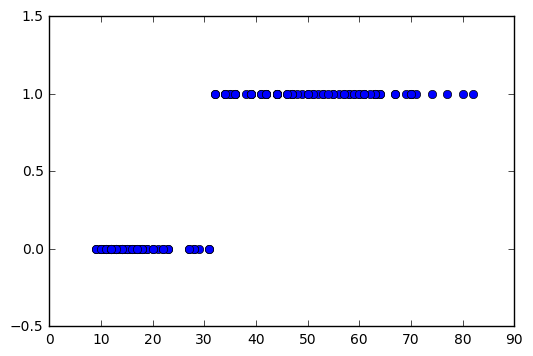

In [48]:
logreg = LogisticRegression(random_state=77)
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
import matplotlib.pyplot as plt
plt.plot(X_test,Y_pred,'o')
plt.ylim(-.5,1.5)
plt.show()

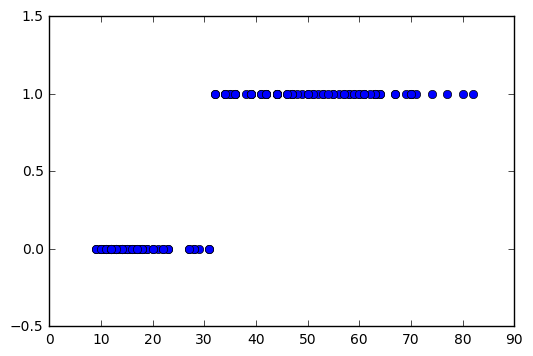

Look at the confusion matrix

In [13]:
from sklearn.metrics import confusion_matrix

conmat = np.array(confusion_matrix(Y_test, Y_pred, labels=[1,0]))

confusion = pd.DataFrame(conmat, index=['has_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])

print(confusion)

            predicted_cancer  predicted_healthy
has_cancer                75                  4
is_healthy                 5                142


Calculate true positives, false positives, true negatives, and false negatives from the confusion matrix

In [76]:
TP = confusion.ix['has_cancer', 'predicted_cancer']   # row index: has_cancer column_index: predicted_cancer
FP = confusion.ix['is_healthy', 'predicted_cancer']
TN = confusion.ix['is_healthy', 'predicted_healthy']
FN = confusion.ix['has_cancer', 'predicted_healthy']

print(zip(['True Positives','False Positives','True Negatives','False Negatives'],
          [TP, FP, TN, FN]))

[('True Positives', 75), ('False Positives', 5), ('True Negatives', 142), ('False Negatives', 4)]


## Check

- People with cancer:  ??
- People without cancer: ??

Calculate the accuracy with the accuracy_score() function from sklearn

In [77]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(Y_test, Y_pred)
print(acc)

0.96017699115


Show that the accuracy is equivalent to: (True Positives + True Negatives) / Total

In [78]:
print((TP + TN) / float(len(Y_test)))

0.96017699115


Create the classification report with the classification_report() function

In [79]:
from sklearn.metrics import classification_report

cls_rep = classification_report(Y_test, Y_pred)
print(cls_rep)

             precision    recall  f1-score   support

          0       0.97      0.97      0.97       147
          1       0.94      0.95      0.94        79

avg / total       0.96      0.96      0.96       226



Show that the precision (for 1 vs 0) is equivalent to: True Positives / (True Positives + False Positives)

In [80]:
# 1 vs. 0
print(float(TP) / (TP + FP))

# 0 vs. 1
print(float(TN) / (TN + FN))

0.9375
0.972602739726


Show that the recall (for 1 vs 0) is equivalent to: True Positives / (True Positives + False Negatives)

In [81]:
## How many class predictions did we "recall" correctly?
# 1 vs. 0
print(float(TP) / (TP + FN))

# 0 vs. 1
print(float(TN) / (TN + FP))

0.949367088608
0.965986394558


Show that the F1-score is equivalent to: 2 * (Precision * Recall) / (Precision + Recall)

![](https://upload.wikimedia.org/math/9/9/1/991d55cc29b4867c88c6c22d438265f9.png)

In [82]:
# 1 vs. 0
pos_precision = float(TP) / (TP + FP)
pos_recall = float(TP) / (TP + FN)
print(2. * (pos_precision * pos_recall) / (pos_precision + pos_recall))

# 0 vs. 1
neg_precision = float(TN) / (TN + FN)
neg_recall = float(TN) / (TN + FP)
print(2. * (neg_precision * neg_recall) / (neg_precision + neg_recall))

0.943396226415
0.969283276451
